<a href="https://colab.research.google.com/github/Shufen-Yin/Artificial-Intelligence/blob/main/Project_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.datasets import fetch_20newsgroups

In [4]:
# Task 1 Text date processing
# 1 Load training dataset only
newsgroups_train = fetch_20newsgroups(subset='train', remove=('headers', 'footers', 'quotes'))

texts = newsgroups_train.data  # list of documents
labels = newsgroups_train.target  # category labels
target_names = newsgroups_train.target_names  # category names


In [7]:
#2: Text Preprocessing
import string
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

def preprocess_text_simple(text):
    # Lowercase
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Tokenize by splitting spaces
    tokens = text.split()
    # Remove stopwords
    tokens = [word for word in tokens if word not in ENGLISH_STOP_WORDS]
    return ' '.join(tokens)

texts_clean = [preprocess_text_simple(doc) for doc in texts]
# This avoids any NLTK download issues and works well for most clustering tasks.

In [8]:
# Task 2 Text Representation
# 1 Implement Bag of Words and TF-IDF for feature extraction.
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Initialize CountVectorizer
bow_vectorizer = CountVectorizer(max_features=5000)  # limit features for efficiency
X_bow = bow_vectorizer.fit_transform(texts_clean)

print("Bag of Words shape:", X_bow.shape)
print("Sample feature names:", bow_vectorizer.get_feature_names_out()[:10])



Bag of Words shape: (11314, 5000)
Sample feature names: ['00' '000' '0000' '01' '02' '03' '0333' '04' '040' '05']


Shape: (11314, 5000) → 11,314 documents and 5,000 most frequent words.

Sample features: '00', '000', '0000', '01', '02', … → includes numeric tokens

In [ ]:
# 2Introduce basic word embeddings and illustrate with a simple pre-trained example


In [9]:
# TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf_vectorizer.fit_transform(texts_clean)

print("TF-IDF shape:", X_tfidf.shape)
print("Sample feature names:", tfidf_vectorizer.get_feature_names_out()[:10])


TF-IDF shape: (11314, 5000)
Sample feature names: ['00' '000' '0000' '01' '02' '03' '0333' '04' '040' '05']


In [11]:
# Install gensim
!pip install gensim


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 73.3 MB/s eta 0:00:00


In [12]:
# Basic Word Embeddings
import gensim.downloader as api

# Load pre-trained GloVe embeddings
word_vectors = api.load("glove-wiki-gigaword-50")

# Example: get embedding for the word 'computer'
vector_computer = word_vectors['computer']
print("Embedding for 'computer':", vector_computer)
print("Shape:", vector_computer.shape)

# Example: calculate similarity between words
similarity = word_vectors.similarity('computer', 'laptop')
print("Similarity between 'computer' and 'laptop':", similarity)


[==================================================] 100.0% 66.0/66.0MB downloaded
Embedding for 'computer': [ 0.079084 -0.81504   1.7901    0.91653   0.10797  -0.55628  -0.84427
 -1.4951    0.13418   0.63627   0.35146   0.25813  -0.55029   0.51056
  0.37409   0.12092  -1.6166    0.83653   0.14202  -0.52348   0.73453
  0.12207  -0.49079   0.32533   0.45306  -1.585    -0.63848  -1.0053
  0.10454  -0.42984   3.181    -0.62187   0.16819  -1.0139    0.064058
  0.57844  -0.4556    0.73783   0.37203  -0.57722   0.66441   0.055129
  0.037891  1.3275    0.30991   0.50697   1.2357    0.1274   -0.11434
  0.20709 ]
Shape: (50,)
Similarity between 'computer' and 'laptop': 0.77411586


Word embeddings capture semantic meaning. Words with similar contexts, like "computer" and "laptop", are close in vector space (similarity = 0.77). This allows clustering algorithms to group documents based on meaning, not just word frequency.

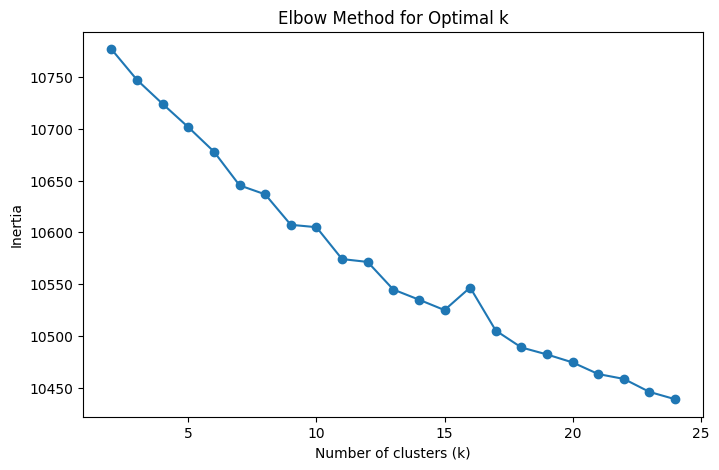

In [21]:
#Task 3 Unsupervised Learning Application
# KMeans Clustering
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Find optimal number of clusters (Elbow method)
# Use a small range for speed; the dataset has 20 newsgroups
inertia_list = []
K_range = range(2, 25)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_tfidf)
    inertia_list.append(kmeans.inertia_)

# Plot inertia
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.plot(K_range, inertia_list, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()








In [22]:
# Fit KMeans
# Choose k = 20
k = 20
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
kmeans.fit(X_tfidf)

cluster_labels = kmeans.labels_
print("Cluster labels for first 10 documents:", cluster_labels[:10])


Cluster labels for first 10 documents: [ 6 11  4 18 19  0  4 11 15 15]


Each number represents the cluster ID assigned by KMeans.

For example:

Document 1 → Cluster 6

Document 2 → Cluster 11

Document 3 → Cluster 4

Documents assigned the same cluster (e.g., 4 or 15) are considered similar in TF-IDF space.

Documents in the same cluster share similar word patterns or topics.

Some clusters may correspond closely to actual newsgroups (like sci.space, rec.autos).

Others might mix related topics, which is normal in unsupervised learning.

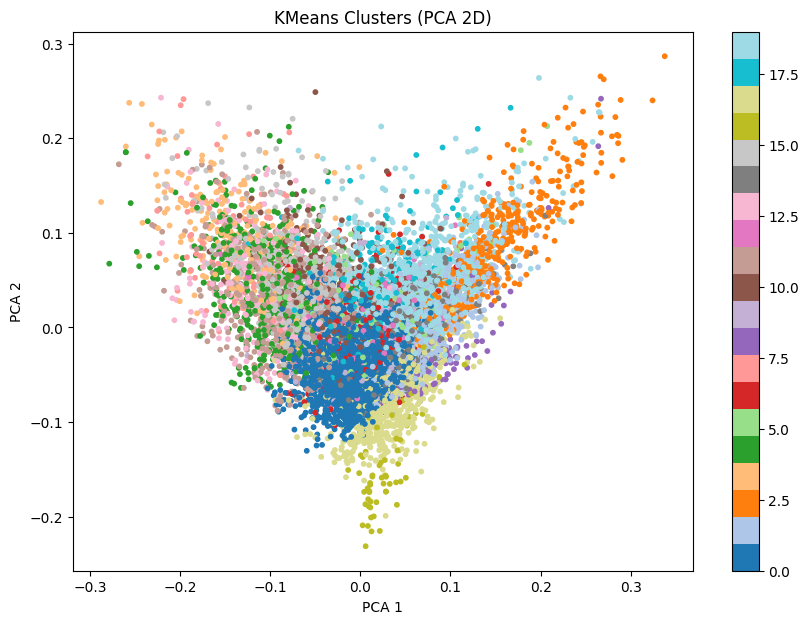

In [23]:
# Visualize clusters (PCA 2D)
# Reduce dimensionality for visualization
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_tfidf.toarray())

plt.figure(figsize=(10,7))
plt.scatter(X_pca[:,0], X_pca[:,1], c=cluster_labels, cmap='tab20', s=10)
plt.colorbar()
plt.title('KMeans Clusters (PCA 2D)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()


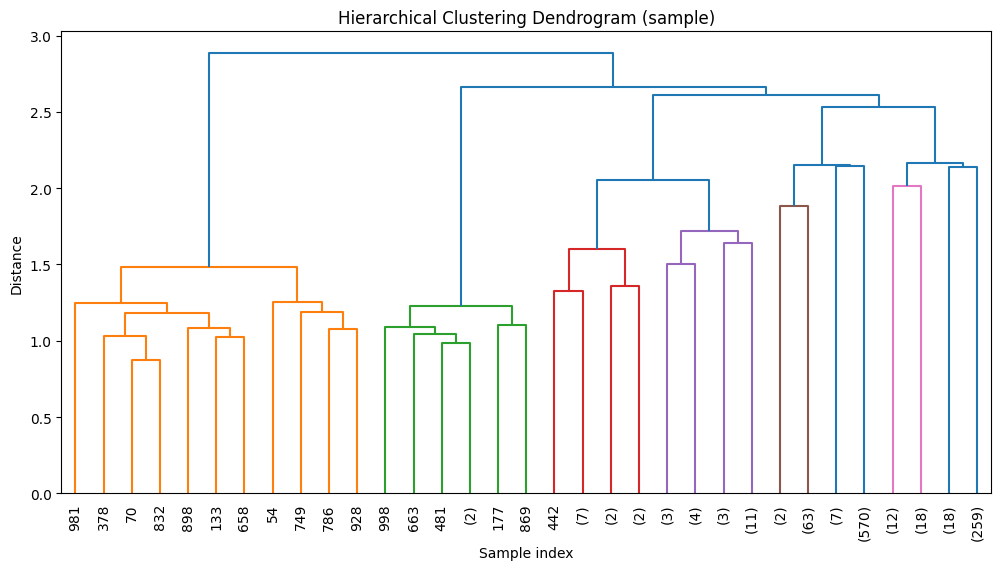

In [24]:
# 2 Hierarchical Clustering
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

# Use a smaller sample for visualization (optional)
sample_size = 1000
X_sample = X_tfidf[:sample_size].toarray()

# Compute linkage matrix (Ward method)
Z = linkage(X_sample, method='ward')

# Plot dendrogram
plt.figure(figsize=(12, 6))
dendrogram(Z, truncate_mode='level', p=5, leaf_rotation=90., leaf_font_size=10.)
plt.title('Hierarchical Clustering Dendrogram (sample)')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()



Hierarchical clustering is computationally heavy, so we often use a subset for visualization.

In [26]:
# Cut the dendrogram to get clusters:
clusters_h = fcluster(Z, t=20, criterion='maxclust')
print("Hierarchical clusters for first 10 samples:", clusters_h[:10])


Hierarchical clusters for first 10 samples: [13  7  7 11  7  7 18 16 19  7]


In [27]:
# Analyze KMeans Clusters
# 1. Top words in each cluster
import numpy as np

def print_top_words(model, feature_names, n_top_words=10):
    for i, cluster_center in enumerate(model.cluster_centers_):
        top_features_indices = cluster_center.argsort()[::-1][:n_top_words]
        top_words = [feature_names[ind] for ind in top_features_indices]
        print(f"Cluster {i}: {', '.join(top_words)}\n")

feature_names = tfidf_vectorizer.get_feature_names_out()
print_top_words(kmeans, feature_names)


Cluster 0: like, new, just, good, time, use, used, got, need, im

Cluster 1: israel, government, people, gun, israeli, law, jews, state, rights, right

Cluster 2: god, jesus, bible, believe, faith, christians, christ, people, christian, gods

Cluster 3: windows, drivers, 31, file, files, driver, thanks, using, use, version

Cluster 4: thanks, email, advance, hi, know, looking, info, im, does, address

Cluster 5: question, answer, mouse, questions, just, know, good, time, dont, think

Cluster 6: car, cars, engine, dealer, like, good, just, new, speed, price

Cluster 7: dos, windows, files, file, version, os2, running, use, pc, thanks

Cluster 8: armenian, armenians, turkish, armenia, genocide, turks, turkey, people, greek, argic

Cluster 9: bike, ride, bikes, riding, dod, just, like, honda, motorcycle, im

Cluster 10: does, know, like, anybody, just, help, im, mean, work, say

Cluster 11: card, monitor, video, mac, memory, bus, ram, apple, cards, simms

Cluster 12: space, launch, lunar,

Interpretation

Look at the top words per cluster and try to match them to actual newsgroups (e.g., sci.space, rec.autos, comp.graphics).

Check if documents in the same cluster share a common theme or topic.

Compare KMeans clusters with true labels using Adjusted Rand Index (ARI) to quantify how well clusters correspond to actual categories.

In [28]:
from sklearn.metrics import adjusted_rand_score

ari = adjusted_rand_score(labels, cluster_labels)
print("Adjusted Rand Index (ARI) with true labels:", ari)


Adjusted Rand Index (ARI) with true labels: 0.07095369860978694


ARI close to 1 → clusters match actual categories well.

ARI near 0 → clusters are almost random.

In [29]:
# Task 4 Model Evaluation and Prediction
#1 Predict Clusters for New Documents
# Example new documents
new_docs = [
    "The NASA telescope discovered a new planet in our solar system.",
    "I just bought a new graphics card for gaming and 3D modeling.",
    "My car needs an oil change and new tires."
]

# Preprocess new documents using the same function
new_docs_clean = [preprocess_text_simple(doc) for doc in new_docs]

# Transform using the same TF-IDF vectorizer
X_new_tfidf = tfidf_vectorizer.transform(new_docs_clean)

# Predict clusters using trained KMeans model
new_clusters = kmeans.predict(X_new_tfidf)
print("Predicted clusters for new documents:", new_clusters)


Predicted clusters for new documents: [ 0 11  6]


Each new document is assigned to the closest cluster based on TF-IDF features.

This demonstrates applicability of your clustering model to unseen data.

In [30]:
# 2 Evaluate Clustering Quality
# 1. Silhouette Score
from sklearn.metrics import silhouette_score

# Silhouette score on training data
sil_score = silhouette_score(X_tfidf, cluster_labels)
print("Silhouette Score for KMeans clusters:", sil_score)


Silhouette Score for KMeans clusters: 0.008410869571367689


 2 Cohesion and Separation

Cohesion: how close points are within the same cluster → measured by inertia (already computed in elbow method).

Separation: how far apart clusters are → can be visualized with PCA or t-SNE.

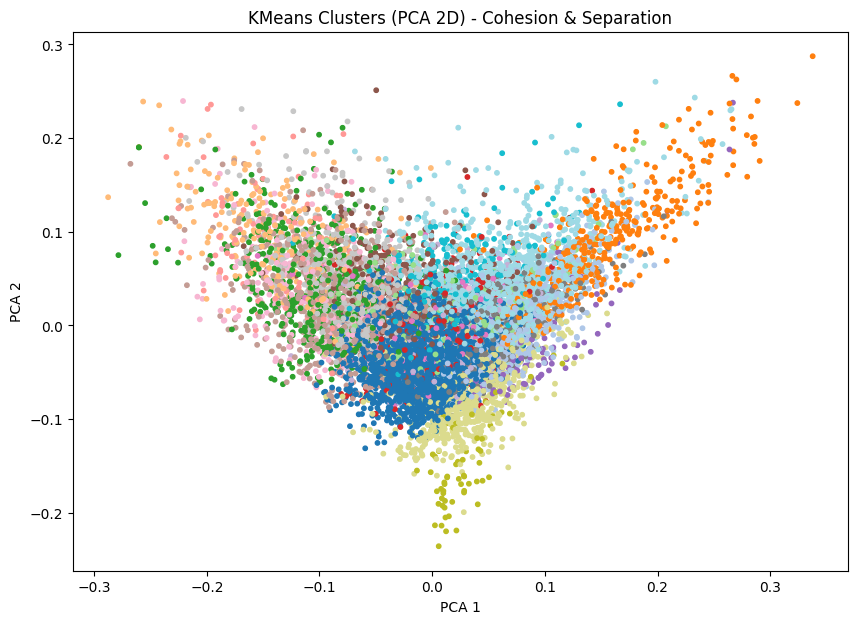

In [31]:
# Optional: scatter plot to visualize cohesion/separation
from sklearn.decomposition import PCA
X_pca = PCA(n_components=2).fit_transform(X_tfidf.toarray())

plt.figure(figsize=(10,7))
plt.scatter(X_pca[:,0], X_pca[:,1], c=cluster_labels, cmap='tab20', s=10)
plt.title('KMeans Clusters (PCA 2D) - Cohesion & Separation')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()
